# Mapping the Gender Pay Gap: Insights for Equity and Action

This notebook investigates the pay gap based on gender across different races and education levels in the US. 

The data comes from [Wages By Education](https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022), from Kaggle.

In this notebook:s

1. [Setup](##1-Setup)
2. [Checking for Corrupt Data](##2-checking-for-corrupt-data)<br>
    2.1. [First Pass](###2.1._First_Pass)<br>
    2.2. [null values](###2.2._null_values)<br>
    2.3. [Preliminary Stats](###2.3._Preliminary_Stats)<br>
    2.4. [Duplicates](###2.4._Duplicates)<br>
3. [Non-categorized columns](##3._Non-categorized_columns)


## 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wages_by_education.csv')

In [3]:
df.head() #the columns include average hourly wages

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [4]:
df.shape

(50, 61)

Let's see what features we have, i.e. the column names, to have an idea of what we are dealing with and what to expect.

In [5]:
df.columns

Index(['year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree', 'men_less_than_hs',
       'men_high_school', 'men_some_college', 'men_bachelors_degree',
       'men_advanced_degree', 'women_less_than_hs', 'women_high_school',
       'women_some_college', 'women_bachelors_degree', 'women_advanced_degree',
       'white_less_than_hs', 'white_high_school', 'white_some_college',
       'white_bachelors_degree', 'white_advanced_degree', 'black_less_than_hs',
       'black_high_school', 'black_some_college', 'black_bachelors_degree',
       'black_advanced_degree', 'hispanic_less_than_hs',
       'hispanic_high_school', 'hispanic_some_college',
       'hispanic_bachelors_degree', 'hispanic_advanced_degree',
       'white_men_less_than_hs', 'white_men_high_school',
       'white_men_some_college', 'white_men_bachelors_degree',
       'white_men_advanced_degree', 'black_men_less_than_hs',
       'black_men_high_school', 'black_men_some_college',
   

The first 5 columns after the `year` column seem to be the average of the following columns, which we can confirm later. 

Otherwise, we can see that the data is grouped in some distinct categories:

- Gender: men/women
- Race: black, white, hispanic 
- Educational Level: less than high school, high school, college, bachelor's degree and advanced degree

In our EDA, we can make comparison of these different groups to answer questions like:

1. Where do we see the biggest gap?
2. Has the gap increased/decreased during time?
3. Are there any years which look off the trend? And if yes, why?


## 2. Checking for Corrupt Data

### 2.1. First Pass
All columns are of type `float`. No conversion is needed. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

### 2.2. `null` values

In [7]:
df.isnull().sum()

year                               0
less_than_hs                       0
high_school                        0
some_college                       0
bachelors_degree                   0
                                  ..
hispanic_women_less_than_hs        0
hispanic_women_high_school         0
hispanic_women_some_college        0
hispanic_women_bachelors_degree    0
hispanic_women_advanced_degree     0
Length: 61, dtype: int64

There is no null data in the table either. 

### 2.3. Preliminary Stats

Checking the preliminary stats, nothing raises a red flag. The means and standard deviations indicate no (or few) outliers in the data.

In [8]:
df.describe().round(2)

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,1997.50,15.70,20.88,23.22,34.77,43.90,17.57,23.83,26.33,39.99,...,12.77,16.46,18.96,27.92,36.19,12.81,16.60,18.96,26.49,34.75
std,14.58,1.13,0.74,0.78,3.31,5.31,1.64,1.23,0.90,3.73,...,0.46,0.70,0.73,2.42,3.12,0.75,0.69,0.95,3.22,5.21
min,1973.00,13.95,19.62,22.04,30.04,35.32,15.39,22.11,24.78,35.16,...,11.77,15.53,17.71,23.54,29.34,11.35,15.53,17.04,18.85,20.93
25%,1985.25,14.89,20.39,22.54,31.88,38.76,16.25,22.94,25.80,36.61,...,12.45,15.86,18.41,25.98,33.87,12.27,16.11,18.29,24.24,30.96
50%,1997.50,15.34,20.85,23.18,34.20,44.08,16.90,23.70,26.36,39.48,...,12.78,16.30,18.79,28.52,37.16,12.72,16.46,18.93,27.39,36.08
75%,2009.75,16.50,21.48,23.70,37.12,47.56,18.61,24.31,27.01,42.34,...,13.03,16.99,19.58,30.11,38.31,13.08,16.98,19.64,28.70,38.37
max,2022.00,18.06,22.70,25.44,41.65,53.74,21.18,26.90,28.55,49.01,...,13.89,18.30,20.45,31.38,42.44,14.97,18.50,21.14,31.55,44.15


A visualization of the data could help understand sparsity better. Since there are so many columns, plotting all in one figure is not going to be comprehensible. Therefore, I divide the data into categories based on educational background.

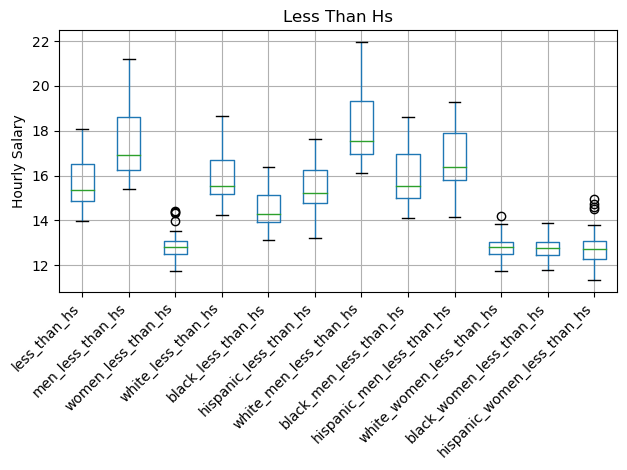

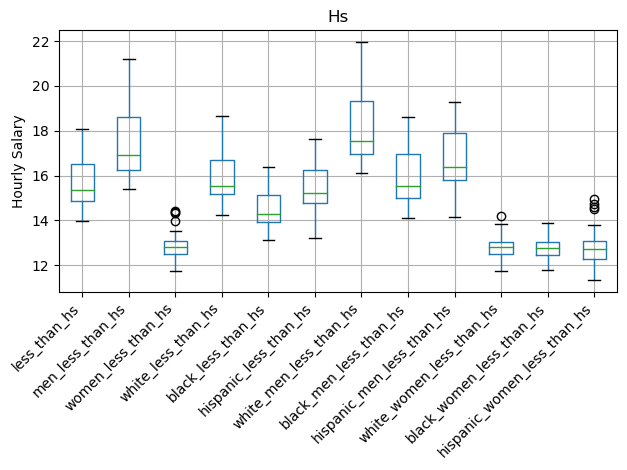

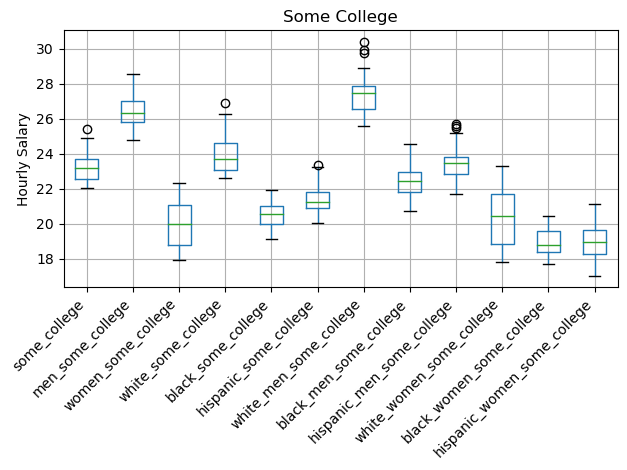

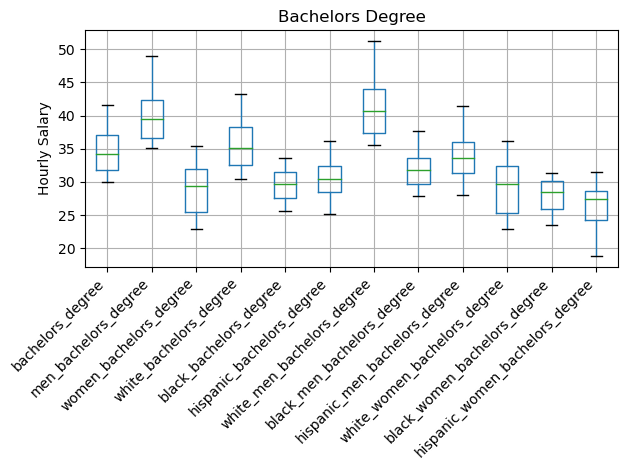

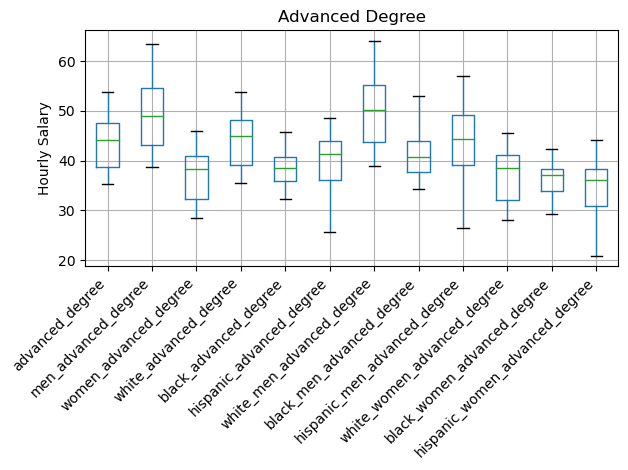

In [91]:
categories = \
['less_than_hs', 'hs', 'some_college', 'bachelors_degree','advanced_degree']
for item in categories:
    df.iloc[:, df.columns.str.contains(fr'{item}')].boxplot()
    plt.title(item)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Hourly Salary')
    plt.title(f"{item.replace('_', ' ').title()}")
    plt.tight_layout()
    plt.show()


Although there are some outliers in the first three categories, i.e. `less_than_hs`, `hs`, `some_college`, the devition does not seem to be big enough to remove them. Let's quatify this by looking at quartiles for these three categories.

We know that [outliers](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/) are numbers smaller than 25% quartile or bigger than 75% quartile. Below, I calculated these quartile numbers as well as the interquartile range. 

In [131]:
Q1 = df.quantile(0.25) # 25% Quartile
Q3 = df.quantile(0.75) # 75% Quartile
IQR = Q3 - Q1 # InterQuartile

Data points that fall below **Q1−1.5×IQR** or above **Q3+1.5×IQR** are considered outliers (same [reference](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/)).

In [132]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

In [133]:
outlier_counts = outliers.sum()
outlier_counts

less_than_hs                       0
high_school                        0
some_college                       1
bachelors_degree                   0
advanced_degree                    0
men_less_than_hs                   0
men_high_school                    1
men_some_college                   0
men_bachelors_degree               0
men_advanced_degree                0
women_less_than_hs                 4
women_high_school                  0
women_some_college                 0
women_bachelors_degree             0
women_advanced_degree              0
white_less_than_hs                 0
white_high_school                  1
white_some_college                 1
white_bachelors_degree             0
white_advanced_degree              0
black_less_than_hs                 0
black_high_school                  0
black_some_college                 0
black_bachelors_degree             0
black_advanced_degree              0
hispanic_less_than_hs              0
hispanic_high_school               2
h

So, we see that we have outliers in 13 columns. We can see their values by running the code below:

In [135]:
outlier_values_dic = {}

for col in df.columns:
    outlier_values_dic[col] = df[col][outliers[col]].dropna().tolist()
    if not outlier_values_dic[col]:  
        del outlier_values_dic[col]

print(outlier_values_dic)

{'some_college': [25.44], 'men_high_school': [26.9], 'women_less_than_hs': [14.33, 14.36, 14.4, 13.96], 'white_high_school': [24.0], 'white_some_college': [26.9], 'hispanic_high_school': [21.03, 21.46], 'hispanic_some_college': [23.34], 'white_men_high_school': [27.54], 'white_men_some_college': [29.93, 29.79, 30.4], 'hispanic_men_some_college': [25.49, 25.58, 25.69], 'white_women_less_than_hs': [14.2], 'hispanic_women_less_than_hs': [14.74, 14.97, 14.58, 14.5], 'hispanic_women_high_school': [18.34, 18.5]}


For our modeling, we need to decide whether to keep these as they are, remove them or replace them with `mean` or `median` or some other imputation technique.

### 2.4. Duplicates

Let's check for duplicates as well.

In [9]:
df.nunique()

year                               50
less_than_hs                       48
high_school                        46
some_college                       48
bachelors_degree                   47
                                   ..
hispanic_women_less_than_hs        43
hispanic_women_high_school         48
hispanic_women_some_college        49
hispanic_women_bachelors_degree    47
hispanic_women_advanced_degree     49
Length: 61, dtype: int64

Some columns have duplicate values, but it is not unexpected since the salary ranges might not have changed between two years. The column that should not have duplicate values is the `year` column and we can see that it does not have duplicates. 

The following method shows that there are no identical rows.

In [29]:
df.duplicated().sum()

0

## 3. Non-categorized columns

Looking at the columns above, we noticed that columns 2-6 do not have specific gender or racial category. Our guess was that they might be an average of the following columns. Let's see if we can confirm our hypothesis. First, let's have a closer look at them:

In [10]:
df.iloc[:, 0:6].head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22
1,2021,16.74,22.28,24.92,41.32,53.45
2,2020,17.02,22.70,25.44,41.65,53.74
3,2019,16.11,21.64,24.00,39.61,51.57
4,2018,15.94,21.50,23.70,38.87,51.03


Now, let's compare the columns with related columns that are more specific. Let's start with the first one; i.e. `less_than_hs`. To make things easier, let's set `year` to be the index column. 

In [11]:
df.set_index('year', inplace = True)

In [12]:
df.head()

,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,,,,,,,,,,
2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,63.51,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,63.52,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,62.70,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,59.93,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,59.73,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [13]:
less_than_hs = df.iloc[:, df.columns.str.contains(r'less_than_hs')]
less_than_hs.head()

,less_than_hs,men_less_than_hs,women_less_than_hs,white_less_than_hs,black_less_than_hs,hispanic_less_than_hs,white_men_less_than_hs,black_men_less_than_hs,hispanic_men_less_than_hs,white_women_less_than_hs,black_women_less_than_hs,hispanic_women_less_than_hs
year,,,,,,,,,,,,
2022,16.52,17.99,14.33,15.70,15.19,17.32,17.14,16.38,18.67,13.84,13.89,14.74
2021,16.74,18.34,14.36,16.20,14.55,17.60,18.13,15.38,18.98,13.77,13.73,14.97
2020,17.02,18.76,14.40,17.01,14.55,17.61,18.97,15.52,19.26,14.20,13.66,14.58
2019,16.11,17.55,13.96,15.89,14.19,16.71,17.66,15.07,17.93,13.44,13.30,14.50
2018,15.94,17.70,13.36,16.05,13.31,16.44,17.96,14.27,18.05,13.45,12.48,13.47


In [14]:
less_than_hs.shape

(50, 12)

We add a new column, named `avg`, which calculates the average of all the columns except the first one (since we are trying to validate it). To do so, we calculate:
- The sum of all columns: `less_than_hs.iloc[:, 1:].sum(axis=1)`
- Divide that by the number of columns -1 (excluding the first column): `less_than_hs.shape[1]-1)`
- Round the resulted number to include 2 decimals

In [15]:
less_than_hs['avg'] = round(less_than_hs.iloc[:, 1:].sum(axis=1)/
(less_than_hs.shape[1]-1), 2)

/var/folders/z0/lg1vzldj0d36ngcfm638k8y80000gn/T/ipykernel_2557/1985208296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_than_hs['avg'] = round(less_than_hs.iloc[:, 1:].sum(axis=1)/


Now, we compare the values in this column with the values in the first column:

In [16]:
less_than_hs['avg'] == less_than_hs['less_than_hs']

year
2022    False
2021    False
2020    False
2019    False
2018    False
2017    False
2016    False
2015    False
2014    False
2013    False
2012    False
2011    False
2010    False
2009    False
2008    False
2007    False
2006    False
2005    False
2004    False
2003    False
2002    False
2001    False
2000    False
1999    False
1998    False
1997    False
1996    False
1995    False
1994    False
1993    False
1992    False
1991    False
1990    False
1989    False
1988    False
1987    False
1986    False
1985    False
1984    False
1983    False
1982    False
1981    False
1980    False
1979    False
1978    False
1977    False
1976    False
1975    False
1974    False
1973    False
dtype: bool

In [17]:
less_than_hs['diff'] = less_than_hs['avg'] - less_than_hs['less_than_hs']

/var/folders/z0/lg1vzldj0d36ngcfm638k8y80000gn/T/ipykernel_2557/1706123353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_than_hs['diff'] = less_than_hs['avg'] - less_than_hs['less_than_hs']


In [18]:
less_than_hs['diff']

year
2022   -0.59
2021   -0.74
2020   -0.79
2019   -0.64
2018   -0.80
2017   -0.67
2016   -0.66
2015   -0.59
2014   -0.47
2013   -0.46
2012   -0.54
2011   -0.39
2010   -0.35
2009   -0.51
2008   -0.51
2007   -0.44
2006   -0.42
2005   -0.46
2004   -0.46
2003   -0.32
2002   -0.38
2001   -0.37
2000   -0.34
1999   -0.37
1998   -0.47
1997   -0.39
1996   -0.35
1995   -0.37
1994   -0.35
1993   -0.43
1992   -0.44
1991   -0.59
1990   -0.60
1989   -0.69
1988   -0.77
1987   -0.69
1986   -0.76
1985   -0.84
1984   -0.85
1983   -0.88
1982   -0.93
1981   -1.00
1980   -1.11
1979   -1.14
1978   -1.14
1977   -1.20
1976   -1.09
1975   -1.25
1974   -1.16
1973   -1.50
Name: diff, dtype: float64

We see there is a mismatch between the values in this column and the average we calculated. Let's try it for another category before drawing conclusions. 

In [19]:
advanced = df.iloc[:, df.columns.str.contains(r'advanced')]
advanced.head()

,advanced_degree,men_advanced_degree,women_advanced_degree,white_advanced_degree,black_advanced_degree,hispanic_advanced_degree,white_men_advanced_degree,black_men_advanced_degree,hispanic_men_advanced_degree,white_women_advanced_degree,black_women_advanced_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,
2022,53.22,63.51,44.34,53.30,44.67,48.30,63.86,52.91,57.08,44.45,39.41,40.64
2021,53.45,63.52,44.80,53.62,43.37,48.60,64.04,49.01,55.60,44.82,40.07,42.47
2020,53.74,62.70,46.04,53.80,45.76,48.58,63.50,51.67,53.58,45.58,42.44,44.15
2019,51.57,59.93,44.22,51.81,42.73,46.69,60.84,46.87,52.24,43.83,40.42,42.30
2018,51.03,59.73,43.19,51.80,42.22,44.83,61.27,46.42,51.27,43.31,39.64,39.35


In [20]:
advanced.shape

(50, 12)

In [21]:
advanced['avg'] = round(advanced.iloc[:, 1:].sum(axis=1)/
(advanced.shape[1]-1), 2)

/var/folders/z0/lg1vzldj0d36ngcfm638k8y80000gn/T/ipykernel_2557/329923106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advanced['avg'] = round(advanced.iloc[:, 1:].sum(axis=1)/


In [22]:
advanced['avg'] == advanced.iloc[:,0]

year
2022    False
2021    False
2020    False
2019    False
2018    False
2017    False
2016    False
2015    False
2014    False
2013    False
2012    False
2011    False
2010    False
2009    False
2008    False
2007    False
2006    False
2005    False
2004    False
2003    False
2002    False
2001    False
2000    False
1999    False
1998    False
1997    False
1996    False
1995    False
1994    False
1993    False
1992    False
1991    False
1990    False
1989    False
1988    False
1987    False
1986    False
1985    False
1984    False
1983    False
1982    False
1981    False
1980    False
1979    False
1978    False
1977    False
1976    False
1975    False
1974    False
1973    False
dtype: bool

Again, we see a mismatch. 

In [23]:
advanced['diff'] = advanced['avg'] - advanced['advanced_degree']

/var/folders/z0/lg1vzldj0d36ngcfm638k8y80000gn/T/ipykernel_2557/3807439958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advanced['diff'] = advanced['avg'] - advanced['advanced_degree']


In [24]:
advanced['diff']

year
2022   -3.00
2021   -3.46
2020   -3.03
2019   -3.22
2018   -3.48
2017   -3.32
2016   -3.46
2015   -3.13
2014   -2.39
2013   -2.70
2012   -2.90
2011   -2.62
2010   -2.77
2009   -2.67
2008   -3.05
2007   -2.49
2006   -2.93
2005   -2.89
2004   -3.44
2003   -3.74
2002   -3.16
2001   -3.54
2000   -2.70
1999   -2.46
1998   -3.03
1997   -3.49
1996   -2.58
1995   -1.96
1994   -2.08
1993   -2.57
1992   -2.96
1991   -3.23
1990   -2.94
1989   -2.34
1988   -2.34
1987   -2.72
1986   -2.86
1985   -2.58
1984   -2.39
1983   -2.78
1982   -2.48
1981   -1.44
1980   -1.61
1979   -2.28
1978   -1.48
1977   -2.69
1976   -2.01
1975   -4.82
1974   -4.05
1973   -0.61
Name: diff, dtype: float64

The discrepency here is bigger than the one for less than high school degree. This discrepency could be that the data was gathered from different resources and was not validated, or it could be a simple arithmetic error. 

How do we handle this? We can take different approaches, such as:

- Validate the data sources 
- Distribute the differnece among the columns
- Ignore the discrepency since it is small enough

For the sake of this project, I will be ignoring this difference. 